In [1]:
import pandas as pd
df = pd.read_csv('data/loan_data_1248_with_missing.csv')
df.head(10)


,income,loan_amount,term,credit_history,defaulted
0,60940.854754,17402.715471,60,1.0,1
1,49511.242579,6664.626123,36,0.0,0
2,63658.393686,17985.281393,60,0.0,1
3,79414.537415,21001.173770,36,1.0,0
4,47785.239255,4037.586145,36,1.0,0
5,NaN,18244.339419,36,1.0,0
6,NaN,23366.013955,60,1.0,1
7,65813.825125,8742.153888,60,1.0,0
8,43549.461053,26035.434321,36,1.0,1
9,61766.080785,18514.114056,60,1.0,0


In [12]:
df.shape

(1248, 5)

In [13]:
df.columns.tolist()

['income', 'loan_amount', 'term', 'credit_history', 'defaulted']

checking for missing data

In [14]:
df.isnull().sum()

income            0
loan_amount       0
term              0
credit_history    0
defaulted         0
dtype: int64

#filling missing data

In [15]:
df.fillna({'income': df['income'].median()}, inplace=True)
df.fillna({'loan_amount': df['loan_amount'].median()}, inplace=True)
df.fillna({'credit_history': df['credit_history'].mode()[0]}, inplace=True)

In [16]:
df.isnull().sum()

income            0
loan_amount       0
term              0
credit_history    0
defaulted         0
dtype: int64

In [17]:
df.describe()

,income,loan_amount,term,credit_history,defaulted
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000
mean,52500.945298,16167.787505,48.000000,0.771635,0.414263
std,16967.161028,5541.521139,12.004811,0.419948,0.492792
min,8000.000000,1000.000000,36.000000,0.000000,0.000000
25%,41673.912889,12772.722413,36.000000,1.000000,0.000000
50%,52462.564119,16052.247335,48.000000,1.000000,0.000000
75%,62987.634437,19610.211517,60.000000,1.000000,1.000000
max,121349.166832,35158.645407,60.000000,1.000000,1.000000


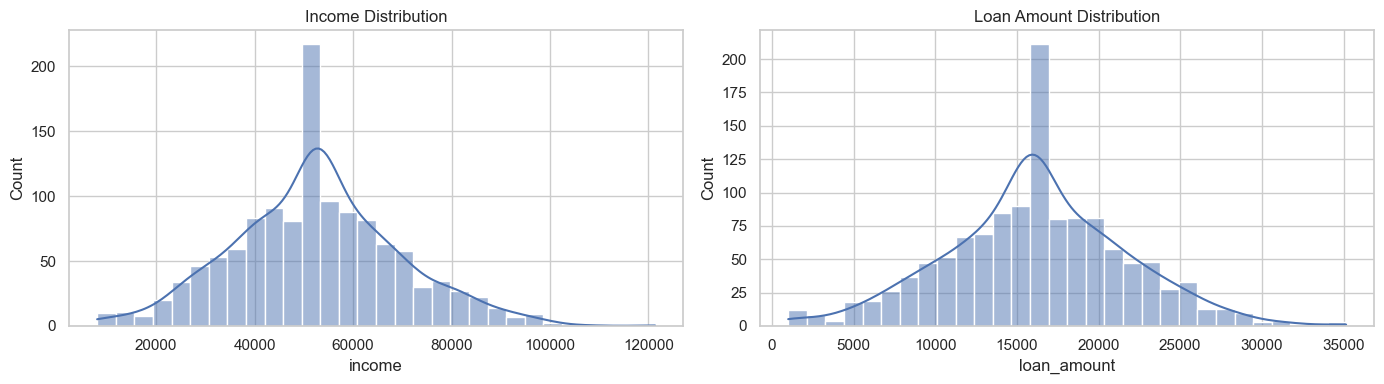

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

fig,axes = plt.subplots(1,2, figsize=(14,4))

sns.histplot(df['income'], kde=True, bins=30, ax= axes[0])
axes[0].set_title('Income Distribution')

sns.histplot(df['loan_amount'], kde=True, bins=30, ax= axes[1])
axes[1].set_title('Loan Amount Distribution')

plt.tight_layout()
plt.show()

Loan Term Count Plot

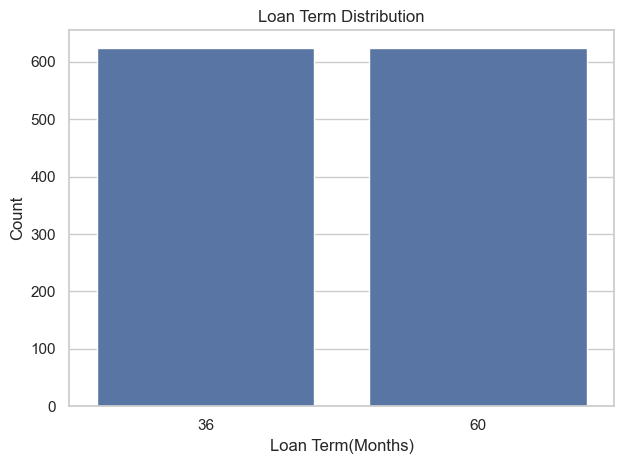

In [19]:
sns.countplot(x='term', data=df)
plt.title('Loan Term Distribution')
plt.xlabel("Loan Term(Months)")
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Credit History vs Defaulted

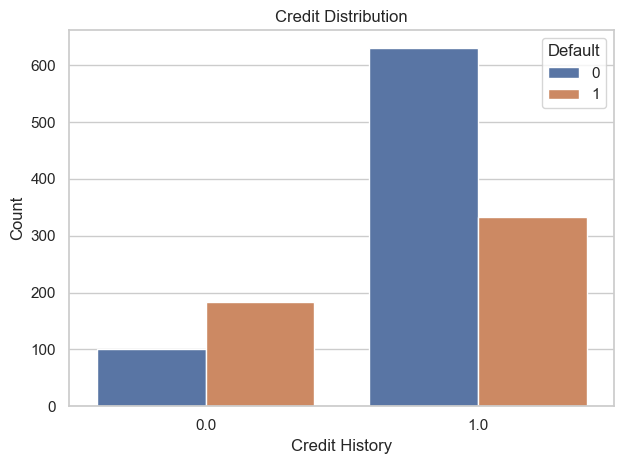

In [20]:
sns.countplot(x='credit_history',hue='defaulted' ,data=df)
plt.title('Credit Distribution')
plt.xlabel("Credit History")
plt.ylabel('Count')
plt.legend(title='Default')
plt.tight_layout()
plt.show()

Correlation Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

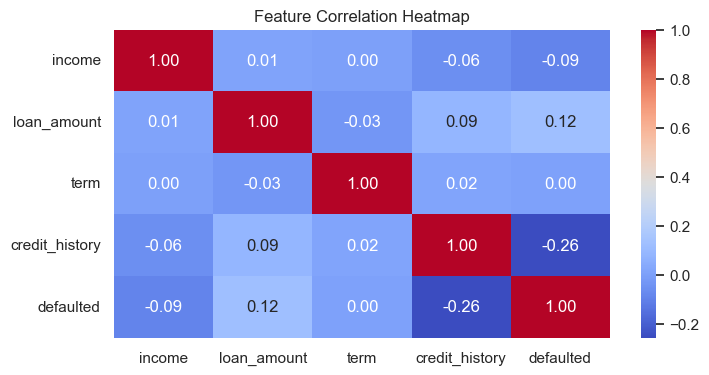

In [22]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show

Convert catagorical features

In [26]:
#36-0 and 60-1
df['term binary'] = df['term'].apply(lambda x:1 if x==60 else 0)

Create derived features

In [37]:
import numpy as np
df['log_income'] = np.log1p(df['income'])
df['log_loan_amount']= np.log1p(df['loan_amount'])

Feauture Selection

In [38]:
features = ['log_income', 'log_loan_amount', 'credit_history']
target = 'defaulted'

Model Training
Feature Scaling


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale_features = ['log_income', 'log_loan_amount']

df[scale_features] = scaler.fit_transform(df[scale_features])
df.head()

,income,loan_amount,term,credit_history,defaulted,term binary,log_income,log loan amount,log_loan_amount
0,60940.854754,17402.715471,60,1.0,1,1,0.555865,9.764439,0.335135
1,49511.242579,6664.626123,36,0.0,0,0,0.010029,8.804719,-1.753786
2,63658.393686,17985.281393,60,0.0,1,1,0.670515,9.797365,0.406800
3,79414.537415,21001.173770,36,1.0,0,0,1.251689,9.952381,0.744209
4,47785.239255,4037.586145,36,1.0,0,0,-0.083218,8.303650,-2.844410


train test split 80% for training and 20% for testing


In [52]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build Model pipeline

Logistic regression for interpretability and baseline performance
Decison Tree Classifier for capturing non linear relationships
Random forest for robustness and improved generalization

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report


In [75]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier':RandomForestClassifier(n_estimators=100, random_state=42)
}

In [78]:
for name, model in models.items():
    print(f"\nModel: {name}")
    pipeline = Pipeline([
    ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    print(f"Accuracy:{accuracy_score(y_test, y_pred):.4f}")
    print('Classification Report')
    print(classification_report(y_test, y_pred))


Model: LogisticRegression
Accuracy:0.6520
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.86      0.74       143
           1       0.67      0.37      0.48       107

    accuracy                           0.65       250
   macro avg       0.66      0.62      0.61       250
weighted avg       0.66      0.65      0.63       250


Model: DecisionTreeClassifier
Accuracy:0.5400
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       143
           1       0.46      0.44      0.45       107

    accuracy                           0.54       250
   macro avg       0.53      0.53      0.53       250
weighted avg       0.54      0.54      0.54       250


Model: RandomForestClassifier
Accuracy:0.6080
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       143
           1       0.55      0.46 